In [296]:
# Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


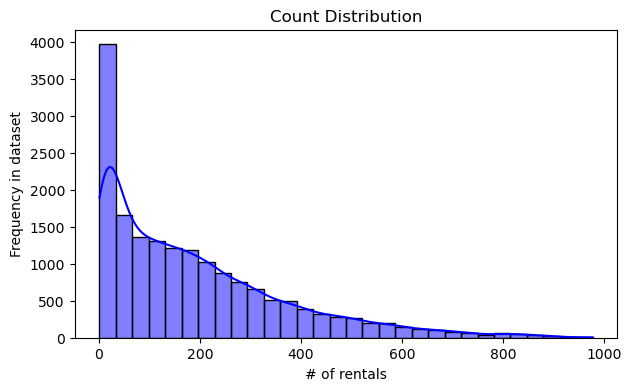

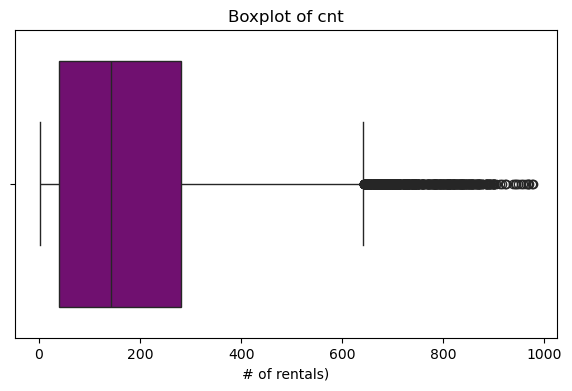


Rentals based on weekday:
Weekday with the most rentals: Friday 487790
Weekday with the least rentals: Sunday 444027

Rentals based on weather situation:
weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64


In [297]:
# Task 1: Exploratory Data Analysis

# loading data into DataFrame
df = pd.read_csv("/Users/clairestewart/ML-fundamentals-2025/bike+sharing+dataset/hour.csv")
df.head()
print(df.info())


# cnt distribution
plt.figure(figsize=(7, 4))
sns.histplot(df['cnt'], kde=True, bins=30, color='blue')
plt.title('Count Distribution', fontsize=12)
plt.xlabel('# of rentals', fontsize=10)
plt.ylabel('Frequency in dataset', fontsize=10)
plt.show()

# boxplot to see cnt skew
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['cnt'], color='purple')
plt.title('Boxplot of cnt', fontsize=12)
plt.xlabel('# of rentals)', fontsize=10)
plt.show()

# rentals based on weekday 
days = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
rentals_by_day = df.groupby('weekday')['cnt'].sum()
print("\nRentals based on weekday:")
print('Weekday with the most rentals:', days[rentals_by_day.idxmax()], rentals_by_day.max())
print('Weekday with the least rentals:', days[rentals_by_day.idxmin()], rentals_by_day.min())

# rentals based on weather
# maybe try to print names with the sums
weather = {1: 'Clear, Few clouds, Partly cloudy', 2: 'Mist + cloudy', 3: 'Light snow/rain', 
           4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}
print("\nRentals based on weather situation:")
print(df.groupby('weathersit')['cnt'].sum())

# Dropping values 
df.drop(columns=['instant', 'casual', 'registered', 'dteday'], inplace=True)

# FINISH LATER 





In [298]:
# Task 2: Data Splitting

# come back and sort bins to preserve temporal order?

x = df.drop(columns=['cnt'])
y = df['cnt']

# First split: split into training data and others
x_train, x_other, y_train, y_other = train_test_split(x, y, test_size=0.4, random_state=42)

# Second split: split the others into test and validation sets
x_val, x_test, y_val, y_test = train_test_split(x_other, y_other, test_size=0.5, random_state=42)

# Print sizes of each set to confirm
print("training set:", x_train.shape)
print("validation set:", x_val.shape)
print("test set:", x_test.shape)


training set: (10427, 12)
validation set: (3476, 12)
test set: (3476, 12)


In [299]:
# Task 3: Feature Engineering 

# Encoding hr and weekday
x_train['hr_sin'] = np.sin(2 * np.pi * df['hr']/24.0)
x_train['hr_cos'] = np.cos(2 * np.pi * df['hr']/24.0)

x_train['weekday_sin'] = np.sin(2 * np.pi * df['weekday']/7.0)
x_train['weekday_cos'] = np.cos(2 * np.pi * df['weekday']/7.0)

# One hot encoding on season, weathersit, yr, and mnth
# Performing One Hot Encoding on pclass, sex, and embarked 
x_train = pd.get_dummies(x_train, columns=['season', 'weathersit', 'yr','mnth'])

# Applying Scaling
scaler = StandardScaler()
scaler.fit_transform(x_train[['temp', 'atemp', 'hum', 'windspeed']])


# fit and transform on only train then apply to test and val?





array([[ 0.01077896,  0.04565074,  1.61716454, -1.55397712],
       [ 0.73722914,  0.66232553,  0.78920996, -0.69823035],
       [ 0.42589335,  0.39845149,  1.41017589, -0.82024592],
       ...,
       [ 1.56745793,  1.45511009, -1.02194067,  0.76841316],
       [-1.33834281, -1.62710142,  0.11649687,  1.86819107],
       [ 0.11455756,  0.13399623,  1.04794577, -0.20934918]])